## Домашнее задание №1

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Abina
[nltk_data]     Kukanova\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import wordnet as wn

In [3]:
wn.add_omw()

In [4]:
sorted(wn.langs()), len(wn.langs())

(['als',
  'arb',
  'bul',
  'cat',
  'cmn',
  'dan',
  'ell',
  'eng',
  'eus',
  'fin',
  'fra',
  'glg',
  'heb',
  'hrv',
  'ind',
  'isl',
  'ita',
  'ita_iwn',
  'jpn',
  'lit',
  'nld',
  'nno',
  'nob',
  'pol',
  'por',
  'ron',
  'slk',
  'slv',
  'spa',
  'swe',
  'tha',
  'zsm'],
 32)

#### Шаг 1 (0.3 балла)
В базе WordNet возьмите синсет 'search.v.01'. Из всех языков, которые есть в базе, извлеките списки лемм, относящихся к этому синсету

In [5]:
lemmas_dict = {}
for name_lang in wn.langs():
    lemmas_dict[name_lang] = [str(lemma.name()) for lemma in wn.synset('search.v.01').lemmas(lang=name_lang)]

c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1498548.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1505508.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2002046.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2917945.
  warnings.warn(f"No WordNet s

In [6]:
lemmas_dict

{'eng': ['search', 'seek', 'look_for'],
 'als': ['gjurmim', 'kërkim', 'kërkoj'],
 'arb': ['استشار',
  'استكشف',
  'اكتشف',
  'بحث',
  'بحث_في',
  'تقصى',
  'حاول',
  'حاول_إيجاد',
  'سبر',
  'سعى_لعمل_شئ',
  'طلب',
  'طمح_في',
  'فتش',
  'فحص',
  'قصد'],
 'bul': ['търся'],
 'cmn': ['寻找', '寻觅', '找', '找寻', '搜寻', '搜查', '搜索'],
 'dan': ['lede', 'søge'],
 'ell': ['ψάχνω'],
 'fin': ['etsiä'],
 'fra': ['chercher', 'rechercher'],
 'heb': ['חִפֵּשׂ'],
 'hrv': ['potražiti', 'pretražiti', 'pretraživati', 'tragati', 'tražiti'],
 'isl': ['leita_að', 'leita_eftir'],
 'ita': ['cercare'],
 'ita_iwn': [],
 'jpn': ['さがし回る',
  '尋ねる',
  '捜しもとめる',
  '捜し求める',
  '捜す',
  '捜索+する',
  '探しまわる',
  '探しもとめる',
  '探し回る',
  '探し求める',
  '探す',
  '探る'],
 'cat': ['buscar', 'cercar', 'escorcollar'],
 'eus': ['arakatu', 'erregistratu', 'miatu'],
 'glg': ['buscar', 'explorar', 'rexistrar'],
 'spa': ['buscar', 'explorar', 'registrar'],
 'ind': ['cari',
  'geledah',
  'memeriksa',
  'mencari',
  'mengacar',
  'mengemong',
  'meng

#### Шаг 2 (0.7 балла)
Теперь, наоборот, для каждой леммы из каждого языка составьте список синсетов, к которым она относится. Из этих синсетов выберите такие, к которым относится больше 3 лемм из нашего изначального списка (надеемся, что это поможет нам выделить более устойчивые и надежные связи). Оставшиеся синсеты и станут узлами нашего графа.

In [7]:
synsets_dict = {}

for name_lang, lemmas in lemmas_dict.items():
    for lemma in lemmas:
        synsets_dict[lemma] = wn.synsets(lemma, lang=name_lang)

In [9]:
final_synsets = []

for lemma, synsets in synsets_dict.items():
    for synset in synsets:
        synset_counter = 0
        for name_lang, lemmas in lemmas_dict.items():
            for lem in lemmas:
                if synset in wn.synsets(lem, lang=name_lang):
                    synset_counter += 1
            if synset_counter > 3:
                final_synsets.append(synset)

final_synsets = list(set(final_synsets))

In [11]:
len(final_synsets)

41

#### Шаг 3 (1 балл)
Теперь строим ребра. Ребро между двумя синсетами ставьте в том случае, если хотя бы в одном языке есть хотя бы одна лемма, которая относится к ним обоим. Пусть граф будет взвешенным: вес ребра будет отражать количество лемм, относящихся к обоим узлам пары.

In [89]:
import networkx as nx

In [ ]:
lemms_freq = {}
for synset in selected_synsets:
    for name_lang in wn.langs():
        for lemma in synset.lemmas(name_lang):
            print(lemma)

In [ ]:
lemms_freq = {}
for synset in selected_synsets:
    for name_lang in wn.langs():
        if synset in lemms_freq:
            for lemma in synset.lemmas(name_lang):
                lemms_freq[synset].append(lemma)
        else:
            for lemma in synset.lemmas(name_lang):
                lemms_freq[synset] = [lemma]

In [ ]:
wsynedges = {}
for e in synedges:
    syn1, syn2 = e
    for ls in lems[syn1]:
        if ls in lems[syn2]:
          if e in wsynedges:
            wsynedges[e] += 1
          else:
            wsynedges[e] = 1
wsynedges

In [ ]:
weight_synsets = {}
for synt_pair in combinations(lemms_freq,2):
    for synset_1 in lemms_freq[synt_pair[0]]:
        if synset_1 in lemms_freq[synt_pair[1]]:
            if synt_pair in weight_synsets:
                weight_synsets[synt_pair] += 1
            else:
                weight_synsets[synt_pair] = 1

weight_synsets

In [90]:
# Создаем пустой взвешенный граф
G = nx.Graph()

In [96]:
for synset_1 in final_synsets:
    for synset_2 in final_synsets:
        if synset_1 != synset_2:
            common_lemmas_count = 0
            for name_lang, lemmas in lemmas_dict.items():
                if any(lemma in synset_1.lemma_names(lang=name_lang) and lemma in synset_2.lemma_names(lang=name_lang) for lemma in lemmas):
                    common_lemmas_count += 1
            if common_lemmas_count > 0:
                G.add_edge(synset_1, synset_2, weight=common_lemmas_count)

In [97]:
print("Узлы графа:", G.nodes())
print("Ребра графа:", G.edges(data=True))

Узлы графа: [Synset('scout.v.01'), Synset('cast_about.v.01'), Synset('quest.v.01'), Synset('search.v.02'), Synset('search.v.01')]
Ребра графа: [(Synset('scout.v.01'), Synset('cast_about.v.01'), {'weight': 1}), (Synset('scout.v.01'), Synset('quest.v.01'), {'weight': 1}), (Synset('scout.v.01'), Synset('search.v.02'), {'weight': 1}), (Synset('scout.v.01'), Synset('search.v.01'), {'weight': 1}), (Synset('cast_about.v.01'), Synset('quest.v.01'), {'weight': 1}), (Synset('cast_about.v.01'), Synset('search.v.02'), {'weight': 1}), (Synset('cast_about.v.01'), Synset('search.v.01'), {'weight': 1}), (Synset('quest.v.01'), Synset('search.v.02'), {'weight': 1}), (Synset('quest.v.01'), Synset('search.v.01'), {'weight': 1}), (Synset('search.v.02'), Synset('search.v.01'), {'weight': 1})]


In [ ]:
import matplotlib.pyplot as plt 
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)  
labels = nx.get_edge_attributes(G, 'weight')  
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
plt.show()  

#### Шаг 4 (3 балла)
Проанализируйте получившийся граф. Сколько получилось связных компонент? Какая у этого графа плотность? Как распределились (взвешенные) степени узлов? Какие узлы оказались центральными (попробуйте несколько метрик, например, degree centrality и eigencentrality, прокомментируйте результат)? Разбейте граф на сообщества (поиграйте с несколькими алгоритмами) и прокомментируйте результаты.

In [100]:
# Выделение связных компонент
connected_components = list(nx.connected_components(G))
print("Связные компоненты:", connected_components)
print("Количество связных компонент:", len(connected_components))

Связные компоненты: [{Synset('search.v.02'), Synset('cast_about.v.01'), Synset('quest.v.01'), Synset('scout.v.01'), Synset('search.v.01')}]
Количество связных компонент: 1


In [103]:
# Плотность графа
density = nx.density(G)
print("Плотность графа:", density)

Плотность графа: 1.0


In [104]:
# Распределение взвешенных степеней узлов
weighted_degrees = dict(G.degree(weight='weight'))
print("Распределение взвешенных степеней узлов:", weighted_degrees)

Распределение взвешенных степеней узлов: {Synset('scout.v.01'): 4, Synset('cast_about.v.01'): 4, Synset('quest.v.01'): 4, Synset('search.v.02'): 4, Synset('search.v.01'): 4}


In [105]:
# Определение центральности узлов
degree_centrality = nx.degree_centrality(G)
print("Центральность по степени (degree centrality):", degree_centrality)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector центральность (eigenvector centrality):", eigenvector_centrality)

Центральность по степени (degree centrality): {Synset('scout.v.01'): 1.0, Synset('cast_about.v.01'): 1.0, Synset('quest.v.01'): 1.0, Synset('search.v.02'): 1.0, Synset('search.v.01'): 1.0}
Eigenvector центральность (eigenvector centrality): {Synset('scout.v.01'): 0.447213595499958, Synset('cast_about.v.01'): 0.447213595499958, Synset('quest.v.01'): 0.447213595499958, Synset('search.v.02'): 0.447213595499958, Synset('search.v.01'): 0.447213595499958}


In [106]:
louvain_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
print("Сообщества, найденные методом Лувена:", louvain_communities)

Сообщества, найденные методом Лувена: [frozenset({Synset('search.v.02'), Synset('search.v.01'), Synset('cast_about.v.01'), Synset('scout.v.01'), Synset('quest.v.01')})]


In [126]:
from networkx.algorithms import community
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [[Synset('cast_about.v.01'), Synset('comb.v.02'), Synset('dredge.v.02'), Synset('inspect.v.01'), Synset('investigate.v.02'), Synset('invite.v.01'), Synset('quest.v.02'), Synset('quest_for.v.01'), Synset('research.v.02'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('seek.v.04'), Synset('seek.v.05'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('quest.v.01')]]
next level communities: [[Synset('cast_about.v.01'), Synset('dredge.v.02'), Synset('inspect.v.01'), Synset('investigate.v.02'), Synset('invite.v.01'), Synset('quest.v.02'), Synset('quest_for.v.01'), Synset('research.v.02'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('seek.v.04'), Synset('seek.v.05'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('comb.v.02')], [Synset('quest.v.01')]]


In [125]:
communities_generator_2 = community.greedy_modularity_communities(G) 
communities_generator_2

[frozenset({Synset('comb.v.02'),
            Synset('inspect.v.01'),
            Synset('investigate.v.02'),
            Synset('invite.v.01'),
            Synset('quest.v.01'),
            Synset('quest.v.02'),
            Synset('search.n.05'),
            Synset('search.v.01'),
            Synset('size_up.v.01')}),
 frozenset({Synset('cast_about.v.01'),
            Synset('dredge.v.02'),
            Synset('quest_for.v.01'),
            Synset('search.n.02'),
            Synset('search.v.02'),
            Synset('try.v.01')}),
 frozenset({Synset('research.v.02'),
            Synset('search.v.04'),
            Synset('seek.v.01'),
            Synset('seek.v.04'),
            Synset('seek.v.05')})]

#### Шаг 5 (2 балла)
Постройте точно такой же граф, только теперь ставьте ребра только в том случае, если пару синсетов объединяет не менее 5 лемм (убираем все ребра с небольшим весом в поисках наиболее устойчивых связей). Проанализируйте этот граф по той же схеме (см. шаг 4). Что изменилось? Какой из графов кажется вам более содержательным и почему?

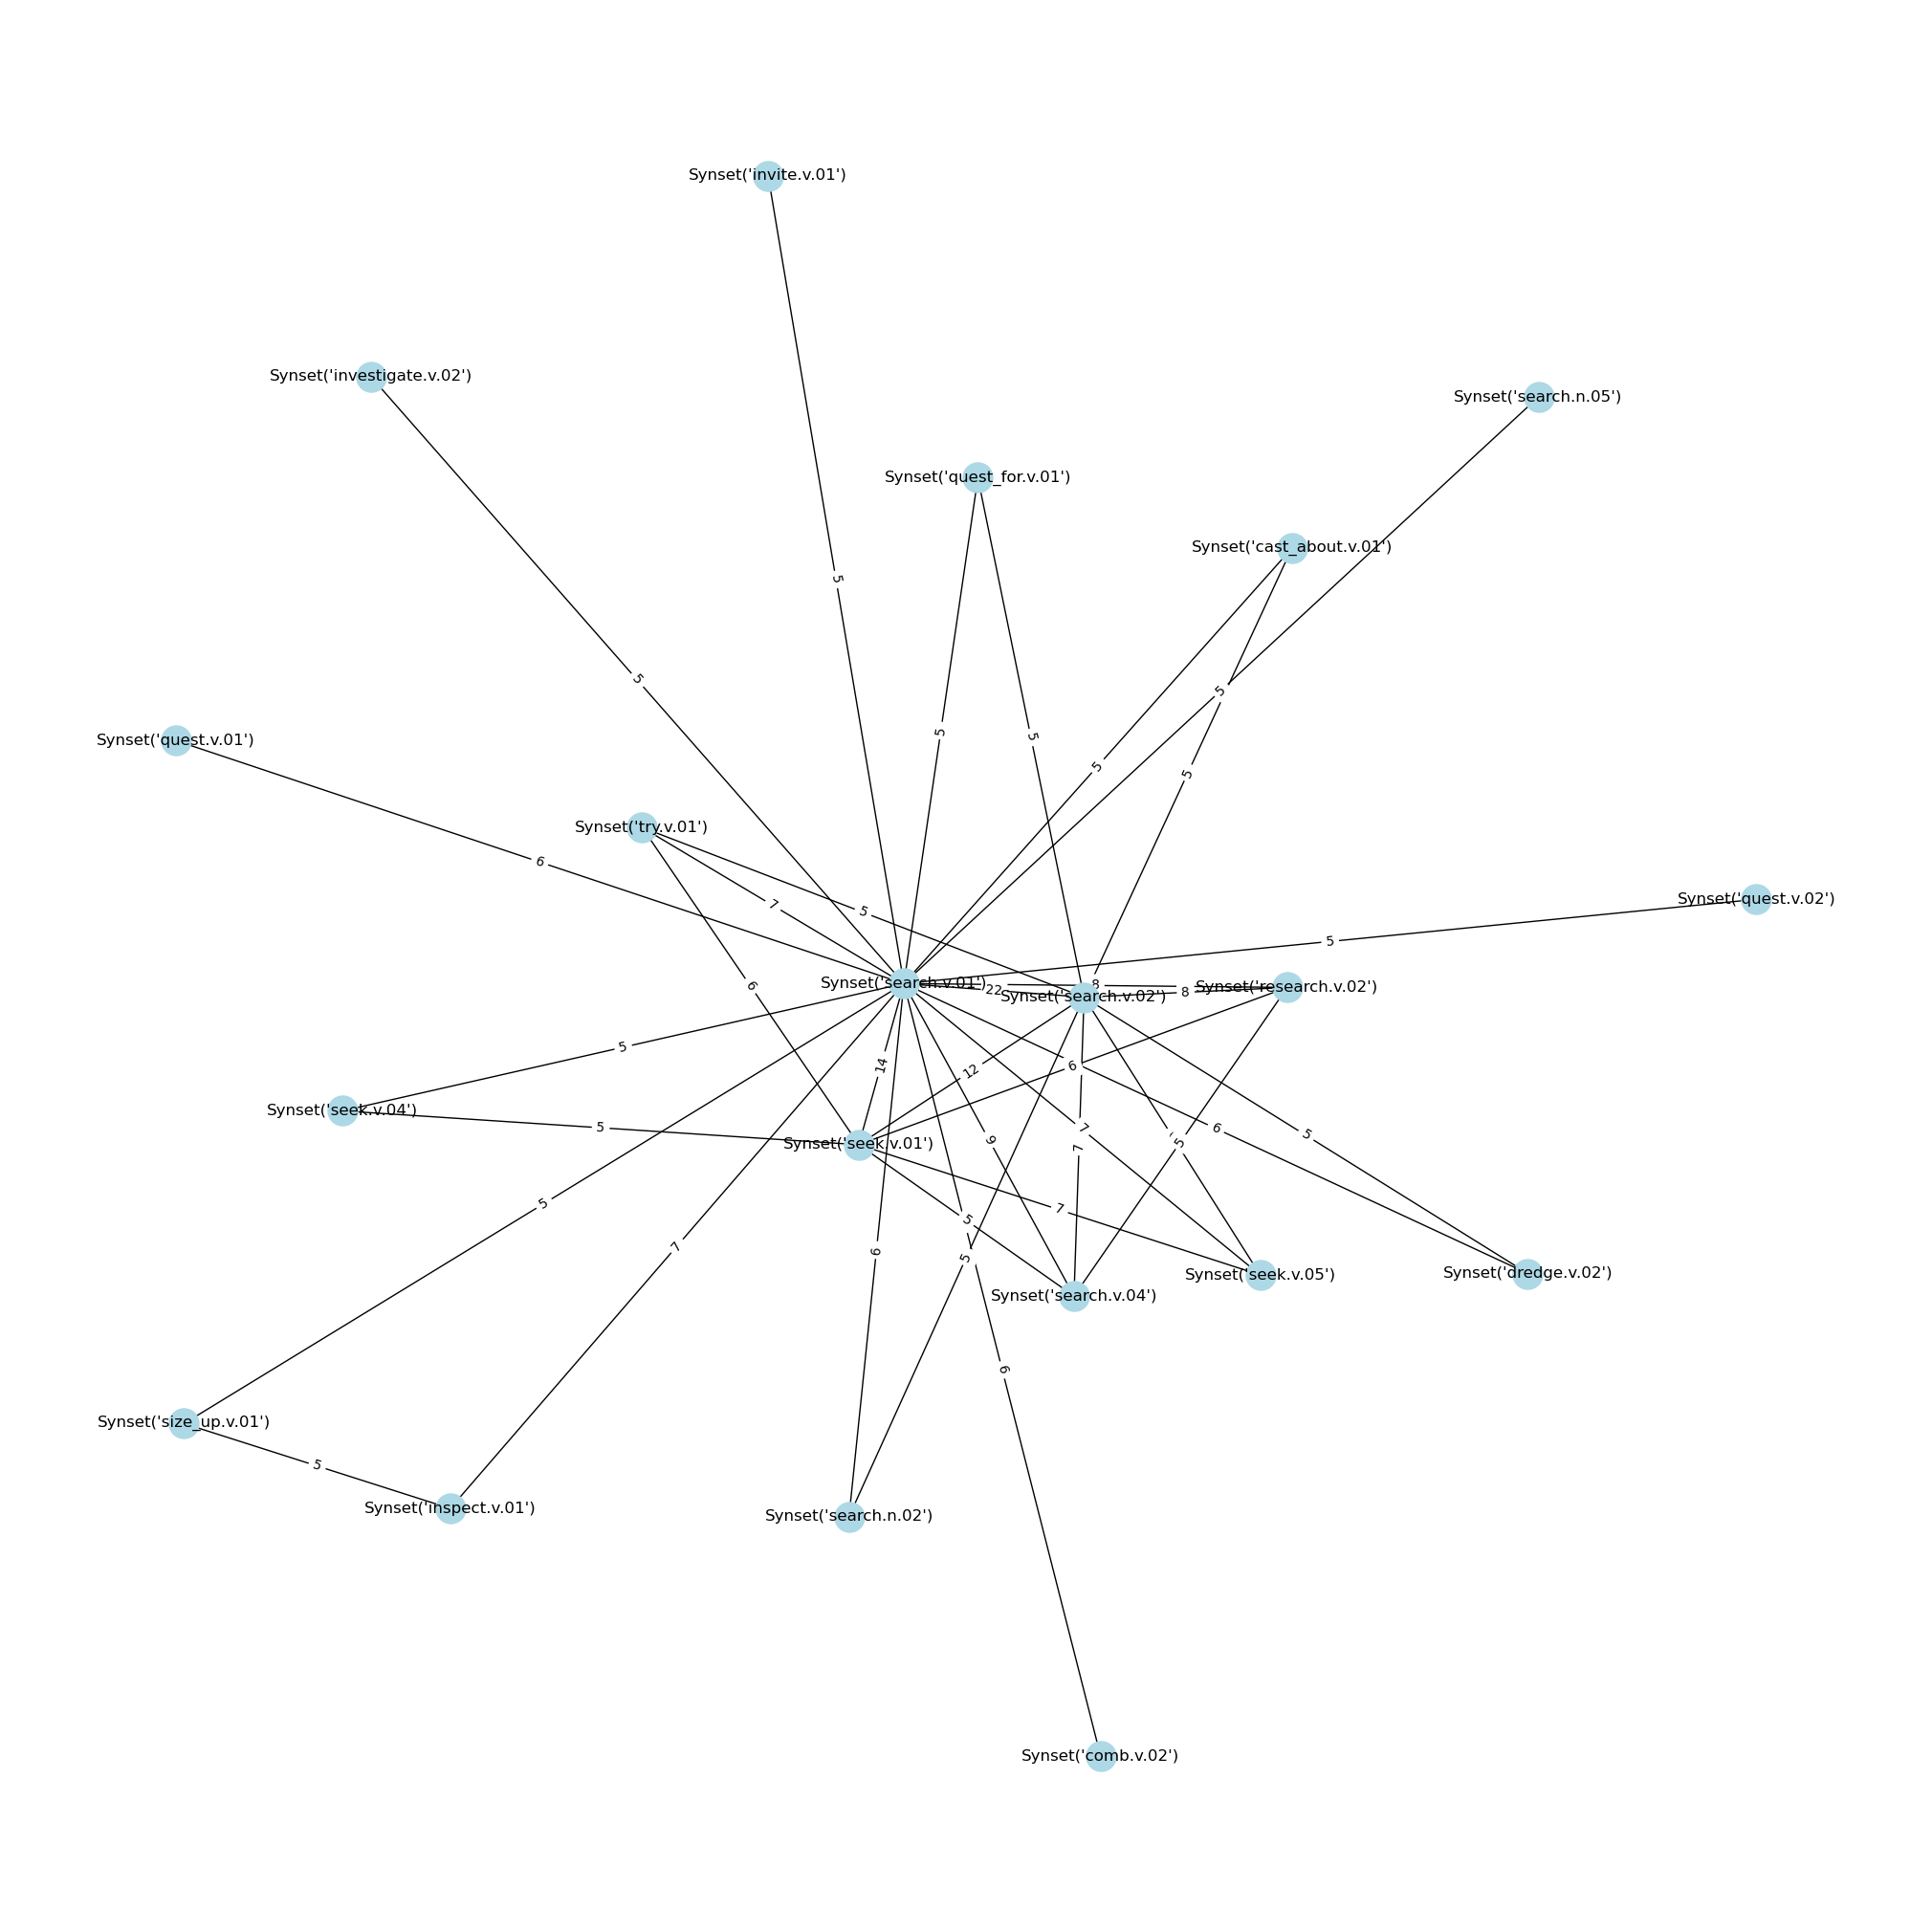

In [116]:
G = nx.Graph()

for synset1 in final_synsets:
    for synset2 in final_synsets:
        if synset1 != synset2:
            common_lemmas_count = 0
            for lang, lemmas in lemmas_dict.items():
                if any(lemma in synset1.lemma_names(lang=lang) and lemma in synset2.lemma_names(lang=lang) for lemma in lemmas):
                    common_lemmas_count += 1
            if common_lemmas_count >= 5:
                G.add_edge(synset1, synset2, weight=common_lemmas_count)

pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [117]:
# Определение связных компонент
connected_components = list(nx.connected_components(G))
print("Связные компоненты:", connected_components)
print("Количество связных компонент:", len(connected_components))

Связные компоненты: [{Synset('quest_for.v.01'), Synset('try.v.01'), Synset('seek.v.05'), Synset('seek.v.04'), Synset('seek.v.01'), Synset('size_up.v.01'), Synset('cast_about.v.01'), Synset('quest.v.01'), Synset('comb.v.02'), Synset('search.v.04'), Synset('search.n.02'), Synset('search.v.02'), Synset('research.v.02'), Synset('investigate.v.02'), Synset('inspect.v.01'), Synset('quest.v.02'), Synset('invite.v.01'), Synset('search.v.01'), Synset('dredge.v.02'), Synset('search.n.05')}]
Количество связных компонент: 1


In [118]:
# Плотность графа
density = nx.density(G)
print("Плотность графа:", density)


Плотность графа: 0.18421052631578946


In [119]:
# Распределение взвешенных степеней узлов
weighted_degrees = dict(G.degree(weight='weight'))
print("Распределение взвешенных степеней узлов:", weighted_degrees)

Распределение взвешенных степеней узлов: {Synset('quest_for.v.01'): 10, Synset('search.v.02'): 80, Synset('search.v.01'): 138, Synset('try.v.01'): 18, Synset('seek.v.01'): 55, Synset('seek.v.05'): 20, Synset('seek.v.04'): 10, Synset('search.v.04'): 26, Synset('research.v.02'): 27, Synset('size_up.v.01'): 10, Synset('inspect.v.01'): 12, Synset('cast_about.v.01'): 10, Synset('quest.v.01'): 6, Synset('comb.v.02'): 6, Synset('search.n.02'): 11, Synset('dredge.v.02'): 11, Synset('investigate.v.02'): 5, Synset('quest.v.02'): 5, Synset('invite.v.01'): 5, Synset('search.n.05'): 5}


In [120]:
# Определение центральности узлов
degree_centrality = nx.degree_centrality(G)
print("Центральность по степени (degree centrality):", degree_centrality)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector центральность (eigenvector centrality):", eigenvector_centrality)

Центральность по степени (degree centrality): {Synset('quest_for.v.01'): 0.10526315789473684, Synset('search.v.02'): 0.5263157894736842, Synset('search.v.01'): 1.0, Synset('try.v.01'): 0.15789473684210525, Synset('seek.v.01'): 0.3684210526315789, Synset('seek.v.05'): 0.15789473684210525, Synset('seek.v.04'): 0.10526315789473684, Synset('search.v.04'): 0.21052631578947367, Synset('research.v.02'): 0.21052631578947367, Synset('size_up.v.01'): 0.10526315789473684, Synset('inspect.v.01'): 0.10526315789473684, Synset('cast_about.v.01'): 0.10526315789473684, Synset('quest.v.01'): 0.05263157894736842, Synset('comb.v.02'): 0.05263157894736842, Synset('search.n.02'): 0.10526315789473684, Synset('dredge.v.02'): 0.10526315789473684, Synset('investigate.v.02'): 0.05263157894736842, Synset('quest.v.02'): 0.05263157894736842, Synset('invite.v.01'): 0.05263157894736842, Synset('search.n.05'): 0.05263157894736842}
Eigenvector центральность (eigenvector centrality): {Synset('quest_for.v.01'): 0.1587614

In [121]:
louvain_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
print("Сообщества, найденные методом Лувена:", louvain_communities)

Сообщества, найденные методом Лувена: [frozenset({Synset('size_up.v.01'), Synset('quest.v.01'), Synset('comb.v.02'), Synset('invite.v.01'), Synset('search.v.01'), Synset('search.n.05'), Synset('investigate.v.02'), Synset('inspect.v.01'), Synset('quest.v.02')}), frozenset({Synset('search.v.02'), Synset('quest_for.v.01'), Synset('dredge.v.02'), Synset('try.v.01'), Synset('cast_about.v.01'), Synset('search.n.02')}), frozenset({Synset('seek.v.05'), Synset('research.v.02'), Synset('seek.v.04'), Synset('search.v.04'), Synset('seek.v.01')})]


In [127]:
from networkx.algorithms import community
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [[Synset('cast_about.v.01'), Synset('comb.v.02'), Synset('dredge.v.02'), Synset('inspect.v.01'), Synset('investigate.v.02'), Synset('invite.v.01'), Synset('quest.v.02'), Synset('quest_for.v.01'), Synset('research.v.02'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('seek.v.04'), Synset('seek.v.05'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('quest.v.01')]]
next level communities: [[Synset('cast_about.v.01'), Synset('dredge.v.02'), Synset('inspect.v.01'), Synset('investigate.v.02'), Synset('invite.v.01'), Synset('quest.v.02'), Synset('quest_for.v.01'), Synset('research.v.02'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('seek.v.04'), Synset('seek.v.05'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('comb.v.02')], [Synset('quest.v.01')]]


In [128]:
communities_generator_2 = community.greedy_modularity_communities(G) 
communities_generator_2

[frozenset({Synset('comb.v.02'),
            Synset('inspect.v.01'),
            Synset('investigate.v.02'),
            Synset('invite.v.01'),
            Synset('quest.v.01'),
            Synset('quest.v.02'),
            Synset('search.n.05'),
            Synset('search.v.01'),
            Synset('size_up.v.01')}),
 frozenset({Synset('cast_about.v.01'),
            Synset('dredge.v.02'),
            Synset('quest_for.v.01'),
            Synset('search.n.02'),
            Synset('search.v.02'),
            Synset('try.v.01')}),
 frozenset({Synset('research.v.02'),
            Synset('search.v.04'),
            Synset('seek.v.01'),
            Synset('seek.v.04'),
            Synset('seek.v.05')})]

Изменилась структура связей между синтетами. Так как мы ставили ребра только в том случае, если пару синсетов объединяет не менее 5 лемм, то в графе остались только более устойчивые и значимые связи. Это позволяет объединить более сильные, устойчивые и информативные связи между синтетами и убрать менее значимые связи, что делает граф более содержательным. 

Второй граф, построенный на условии объединения пар ребер не менее 5 леммами, скорее всего более содержательный, чем первый, так как выделяет более устойчивые связи между синтетами. 

Первый граф, построенный на условии объединения пар ребер хотя бы одной леммой, имеет как и сильные, так и слабые связи, что усложняет выделение наиболее значимых коллокаций. Второй граф, наоборот, показывает более сильные и информативные связи. Это упрощает выделение значимых коллокаций. Чем больше общих лемм между пар синтетов, тем легче выделить более значимые коллокации. 

Первый граф, который построен без ограничения на количество общих лемм между пар синтетов, содержит более общие связи между синтетами. Могут быть более общие и абстрактные значения в этом поле. Второй граф кажется будет выделять более конкретные значения в этой зоне глаголов. 

Подграф LOOK FOR из базы CLICS скорее всего покажет настоящую сочетаемость данного глагола в контекстах. Этот подграф имеет синтаксические, семантические и прагматические знания об употреблении настоящего глагола. Скорее всего будут общие коллокации с нашими двумя графами, но встречаемость в контекстах возможно будет разная. 